# Rejection Sampling

**Important Notes**

- The _target_ distribution's density function will be denoted with $f(x)$
- The _trial_ distribution's density function will be denoted with $g(x)$

**Basic Algorithm**

1. Generate $U \sim \text{Uniform(0, 1)}$
2. Generate $X \sim g(x)$
3. If $U \le \frac{f(X)}{M \cdot g(X)}$ then accept $X$ as a realization from
$f(x)$, otherwise reject $X$ and try again

**Goals**

Our goal in this notebook is to generate random samples for the Normal distribution using the Cauchy distribution as our trial.

## Step 1: Visualizing Our Distributions

Here is a quick visualization so things can stand in prespective.

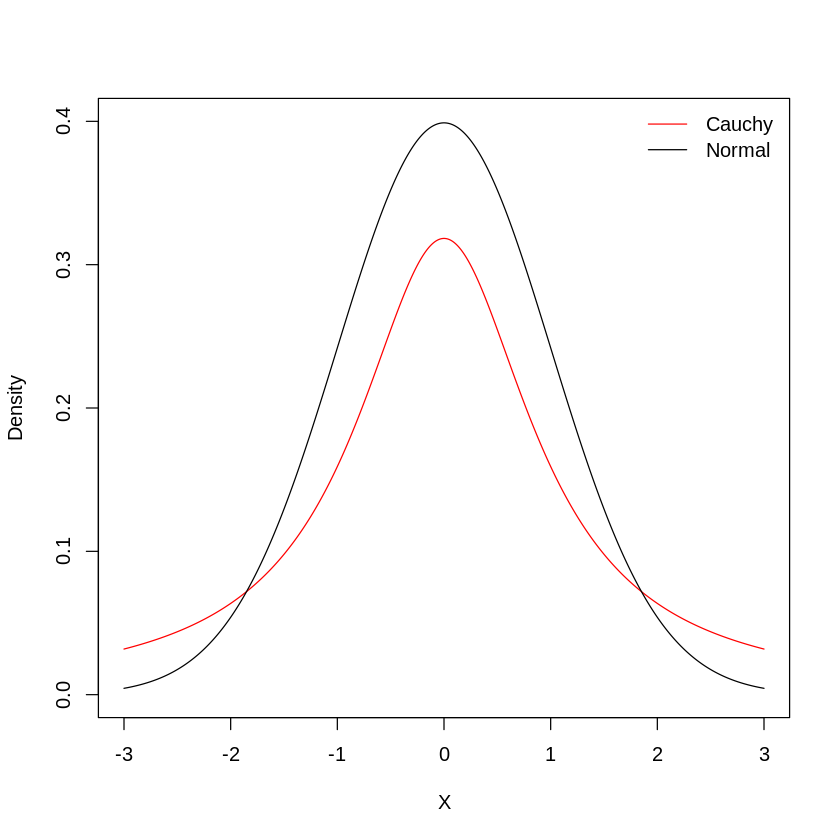

In [1]:
x <- seq(-3, 3, .01)

plot(x, dcauchy(x), type="l", col="red", ylim=c(0, .4), xlab="X", ylab="Density")
lines(x, dnorm(x))

legend("topright", legend=c("Cauchy", "Normal"), lty=1, col=c("red", "black"), bty="n")

## Step 2: Calculating $M$

$$
f(x) = \frac{1}{\sqrt{2 \pi}} e^{\tfrac{-x^2}{2}}
$$

$$
g(x) = \frac{1}{\pi} \frac{1}{1 + x^2}
$$

$$
\frac{f(x)}{g(x)} = \sqrt{\frac{\pi}{2}} (1 + x^2) e^{\tfrac{-x^2}{2}} \le
\sqrt{\frac{2 \pi}{e}} \simeq 1.52
$$

## Step 3: Coding it All

In [2]:
# sample size
n <- 10000

# function to determine acception/rejection
accept <- function(x) {
  u <- runif(1)
  if ( (0.66 * (pi / 2)^.5 * (1 + x^2) * exp(-x^2 / 2)) > u) {
    return(TRUE)
  }
  return(FALSE)
}


# trials
X <- rep(0, n)
niter <- 0
sample <- NULL

for (i in 1:n) {
  # keep trying until acception
  flag <- FALSE
  while (flag == FALSE) {
    # increment counter
    niter <- niter + 1

    # generate candidate
    sample <- rcauchy(1)
    flag <- accept(sample)
  }

  X[i] <- sample
}

In [3]:
mean(X)

[1] -0.004439723

In [4]:
var(X)

[1] 1.001505

In [5]:
niter

[1] 15186

We can see that the mean and variance are very close to the theoretical mean and variance of the Normal distribution. Also note that the number of iterations required is 

$$
M \cdot n = 1.52 \times 10000 \simeq 15200
$$

Also, keep in mind that

$$
P(\text{accept}) = \dfrac{1}{M} = \dfrac{1}{52} = .66
$$